<a href="https://colab.research.google.com/github/SebaDiezV/Hackaton_NoCountry_Equipo_65/blob/main/Netflix_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
#Se importan las bibliotecas iniciales  necesarias para el desafio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
ruta_archivo='https://raw.githubusercontent.com/VillaltaE/netflix_churn/refs/heads/main/netflix_customer_churn.csv'
df = pd.read_csv(ruta_archivo)


In [ ]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
df.sample(5)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
98,20,Other,Premium,3.40,33,Africa,Tablet,17.99,1,Crypto,5,0.10,Drama
1163,66,Male,Premium,32.92,33,Asia,Mobile,17.99,0,Debit Card,4,0.97,Drama
4032,54,Female,Basic,6.76,52,Asia,Tablet,8.99,1,PayPal,5,0.13,Drama
1466,66,Other,Premium,0.27,59,North America,Tablet,17.99,1,Gift Card,2,0.00,Documentary
348,40,Female,Standard,7.02,18,Africa,Tablet,13.99,0,PayPal,4,0.37,Sci-Fi


#🔧 Transformación

#📊 Carga y análisis

In [ ]:
#Informacion general del data frame, para conocer los tipo de datos y cuantos son nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
# Copmprobando si hay los valores nulos
print(df.isnull().sum())

age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


In [ ]:
Columns = df.columns
print(Columns)

Index(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='object')


In [ ]:
#Numero de columnas
df.shape[1]

13

In [ ]:
#Numero de filas
df.shape[0]

5000

In [ ]:
#Se elimina 'customer_id' no se usará en el análisis
df = df.drop(['customer_id'],axis=1)
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
# Relación churn = 1 respecto chrun = 0
df['churned'].value_counts(normalize=True)

,proportion
churned,
1,0.503
0,0.497


In [ ]:
#Numero de churn =  1
df['churned'].value_counts()


,count
churned,
1,2515
0,2485


In [ ]:
# Analisis de los usuarios que se salieron
df_si_churned = df[df['churned'] == 1].copy()

In [ ]:
# Analisis de los usuarios que se salieron
df_si_churned.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.0,2515.000000,2515.000000
mean,43.793241,5.918497,38.309344,13.125189,1.0,2.801193,0.164048
std,15.472773,5.418978,14.751904,3.764869,0.0,1.383301,0.186164
min,18.000000,0.010000,0.000000,8.990000,1.0,1.000000,0.000000
25%,30.000000,1.830000,30.000000,8.990000,1.0,2.000000,0.060000
50%,44.000000,4.060000,41.000000,13.990000,1.0,3.000000,0.120000
75%,57.000000,8.710000,50.000000,17.990000,1.0,4.000000,0.230000
max,70.000000,41.330000,60.000000,17.990000,1.0,5.000000,4.320000


In [ ]:
# Analisis de los usuarios que no se salieron
df_no_churned = df[df['churned'] == 0].copy()

In [ ]:
# Analisis de los usuarios que no se salieron
df_no_churned.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.0,2485.000000,2485.000000
mean,43.902213,17.449590,21.771026,14.248350,0.0,3.250302,1.594133
std,15.532694,13.923952,16.155030,3.528817,0.0,1.412834,3.570493
min,18.000000,0.010000,0.000000,8.990000,0.0,1.000000,0.000000
25%,30.000000,7.380000,9.000000,8.990000,0.0,2.000000,0.400000
50%,44.000000,13.860000,19.000000,13.990000,0.0,3.000000,0.720000
75%,58.000000,24.020000,30.000000,17.990000,0.0,4.000000,1.460000
max,70.000000,110.400000,60.000000,17.990000,0.0,5.000000,98.420000


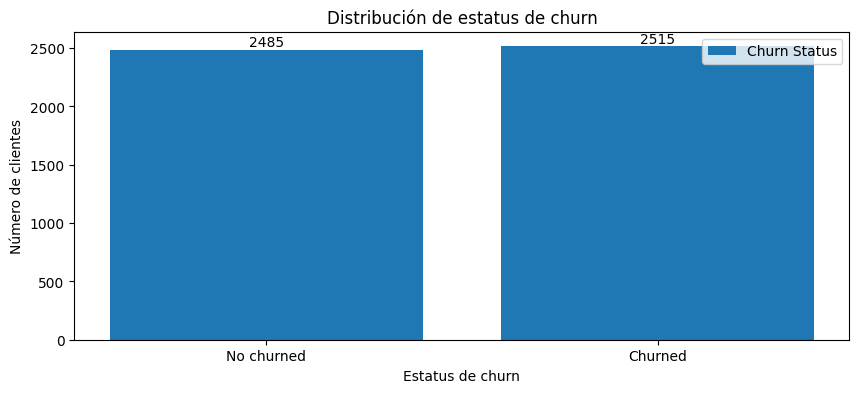

In [ ]:
#Graficar el estatus de los evasores vs no evasores
no_churn = df[df['churned'] == 0]
yes_churn = df[df['churned'] == 1]

# Obtenga el recuento total de los clientes evasores y no evasores
no_churn_count = len(df[df['churned'] == 0])
yes_churn_count = len(df[df['churned'] == 1])
fig,ax = plt.subplots(1,1,figsize=(10,4))

#Crea una lista de etiquetas y recuentos correspondientes para las barras.
labels = ['No churned', 'Churned']
counts = [no_churn_count, yes_churn_count]

#Crea el gráfico de barras. El primer argumento es la posición x o las etiquetas,
# y el segundo es la altura de las barras.
bars = ax.bar(labels, counts, label='Churn Status')

# Incluye leyenda
ax.legend()

# agregue títulos y etiquetas para mayor claridad.
ax.set_title('Distribución de estatus de churn')
ax.set_xlabel('Estatus de churn')
ax.set_ylabel('Número de clientes')

# Agregar los números de clientes en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

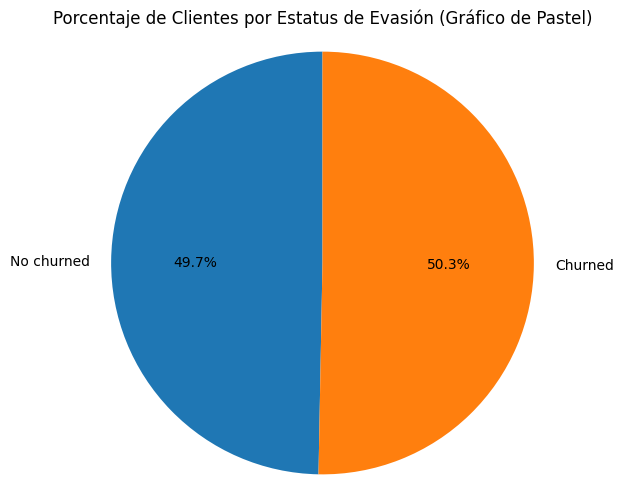

In [ ]:

# Calcula el número total de clientes
total_customers = len(df)


# Calcula los porcentajes
percentages = [count / total_customers * 100 for count in counts]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Porcentaje de Clientes por Estatus de Evasión (Gráfico de Pastel)')
ax.axis('equal')  # Aspecto igual asegura que el pastel se dibuja como un círculo.
plt.show()

In [ ]:
#Datos de gender de los que se fueron
#no_churn.groupby('InternetService')['InternetService'].count()
yes_churn.groupby('gender')['gender'].count()  # se van mas mujeres respecto a los otros generos

,gender
gender,
Female,874
Male,827
Other,814


In [ ]:
#Datos de gender de los que se no se fueron

no_churn.groupby('gender')['gender'].count() # se van mas mujeres respecto a los otros generos

,gender
gender,
Female,837
Male,827
Other,821


In [ ]:
#Agrupando por tipo de subscripcion de los que se van
yes_churn.groupby('subscription_type')['subscription_type'].count()

,subscription_type
subscription_type,
Basic,1027
Premium,740
Standard,748


In [ ]:
#Agrupando por tipo de subscripcion de los que no se van
no_churn.groupby('subscription_type')['subscription_type'].count()

,subscription_type
subscription_type,
Basic,634
Premium,953
Standard,898


In [ ]:
#Agrupando por tipo de region de los que se van
yes_churn.groupby('region')['region'].count()

,region
region,
Africa,388
Asia,426
Europe,448
North America,421
Oceania,383
South America,449


In [ ]:
#Agrupando por tipo de region de los que no se van
no_churn.groupby('region')['region'].count()

,region
region,
Africa,415
Asia,415
Europe,419
North America,430
Oceania,382
South America,424


In [ ]:
#Agrupando por tipo de device(equipo) de los que se van
yes_churn.groupby('device')['device'].count()

,device
device,
Desktop,467
Laptop,521
Mobile,507
TV,496
Tablet,524


In [ ]:
#Agrupando por tipo de device(equipo) de los que no se van
no_churn.groupby('device')['device'].count()

,device
device,
Desktop,482
Laptop,485
Mobile,497
TV,497
Tablet,524


In [ ]:
#Agrupando por motodo de pago de los que se van
yes_churn.groupby('payment_method')['payment_method'].count()

,payment_method
payment_method,
Credit Card,424
Crypto,594
Debit Card,450
Gift Card,564
PayPal,483


In [ ]:
#Agrupando por motodo de pago de los que no se van
no_churn.groupby('payment_method')['payment_method'].count()

,payment_method
payment_method,
Credit Card,549
Crypto,401
Debit Card,580
Gift Card,412
PayPal,543


In [ ]:
#Agrupando porgenero favorito  de los que se van
yes_churn.groupby('favorite_genre')['favorite_genre'].count()

,favorite_genre
favorite_genre,
Action,365
Comedy,342
Documentary,370
Drama,382
Horror,367
Romance,350
Sci-Fi,339


In [ ]:
#Agrupando porgenero favorito  de los que no se van
no_churn.groupby('favorite_genre')['favorite_genre'].count()

,favorite_genre
favorite_genre,
Action,332
Comedy,343
Documentary,359
Drama,349
Horror,346
Romance,375
Sci-Fi,381


In [ ]:
#Media de horas vistas de los que se van
yes_churn['watch_hours'].mean()

np.float64(5.918497017892644)

In [ ]:
#Media de horas vistas de los que no se van
no_churn['watch_hours'].mean()

np.float64(17.449589537223343)

In [ ]:
#Media de los dias desde la ultima conexión  de los que se van
yes_churn['last_login_days'].mean()

np.float64(38.30934393638171)

In [ ]:
#Media de los dias desde la ultima conexión  de los no que se van
no_churn['last_login_days'].mean()

np.float64(21.77102615694165)

In [ ]:
#Media del pago mensual de los que se van
yes_churn['monthly_fee'].mean()

np.float64(13.125188866799201)

In [ ]:
#Media del pago mensual de los que no se van
no_churn['monthly_fee'].mean()

np.float64(14.24835010060362)

In [ ]:
#Media del número de perfiles de los que se van
yes_churn['number_of_profiles'].mean()

np.float64(2.801192842942346)

In [ ]:
#Media del número de perfiles de los que no se van
no_churn['number_of_profiles'].mean()

np.float64(3.2503018108651913)

In [ ]:
#Media del promedio de tiempo viendo Netflix por dia  de los que se van
yes_churn['avg_watch_time_per_day'].mean()

np.float64(0.16404771371769386)

In [ ]:
#Media del promedio de tiempo viendo Netflix por dia  de los que no se van
no_churn['avg_watch_time_per_day'].mean()

np.float64(1.5941327967806842)

In [ ]:
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre'],
      dtype='object')

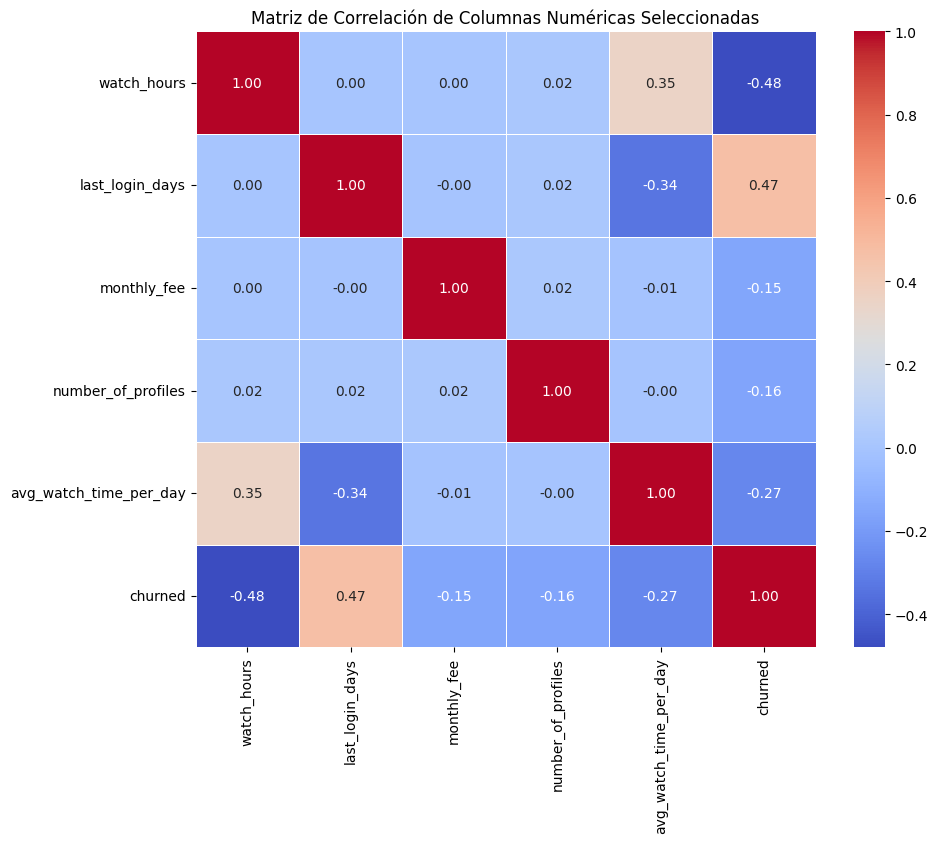

In [ ]:
# Crear una matriz de correlación para columnas numéricas seleccionadas
# Seleccionar algunas columnas numéricas para incluir en la matriz de correlación
numeric_cols = ['watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day','churned']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Crear un mapa de calor (heatmap) para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Columnas Numéricas Seleccionadas')
plt.show()

#📄Informe final